<a href="https://colab.research.google.com/github/DoLienKhoa/KHDLUD/blob/main/KHDLUD_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I. Giới thiệu

## 1. Mục tiêu bài toán 
- Mục tiêu của cuộc thi [M5 Forecasting - Accuracy](https://www.kaggle.com/competitions/m5-forecasting-accuracy/overview/) là có thể dự đoán được khả năng bán hàng của của Walmart, cụ thể như trong văn bản hướng dẫn (Hyperlink trong M5) thì ta sẽ dự đoán trước 28 ngày. Trong cuộc thi [M5](https://github.com/Mcompetitions/M5-methods/blob/master/M5-Competitors-Guide.pdf) này có mục tiêu là tìm ra thuật toán tốt nhất để đưa ra dự đoán chính xác nhất có thể, để dự đoán trên bộ series dữ liệu gồm có 42,840 series và mức dự đoán tại các mốc là trung vị, 50%, 67%, 95%, 99%. 

## 2. Giới thiệu bộ dữ liệu.

### Bảng thống kê về thành phần series có trong bộ dữ liệu.

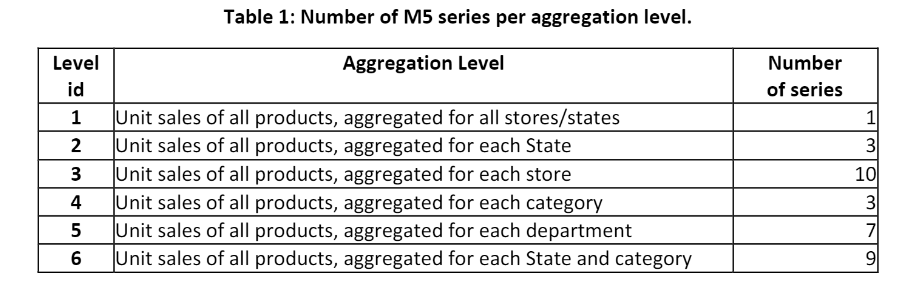

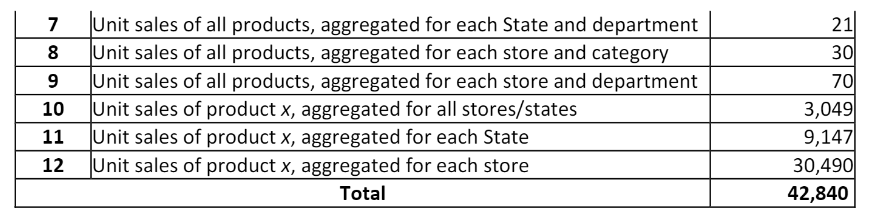

### Hình minh họa cấu trúc lưu trữ của bộ dữ liệu.
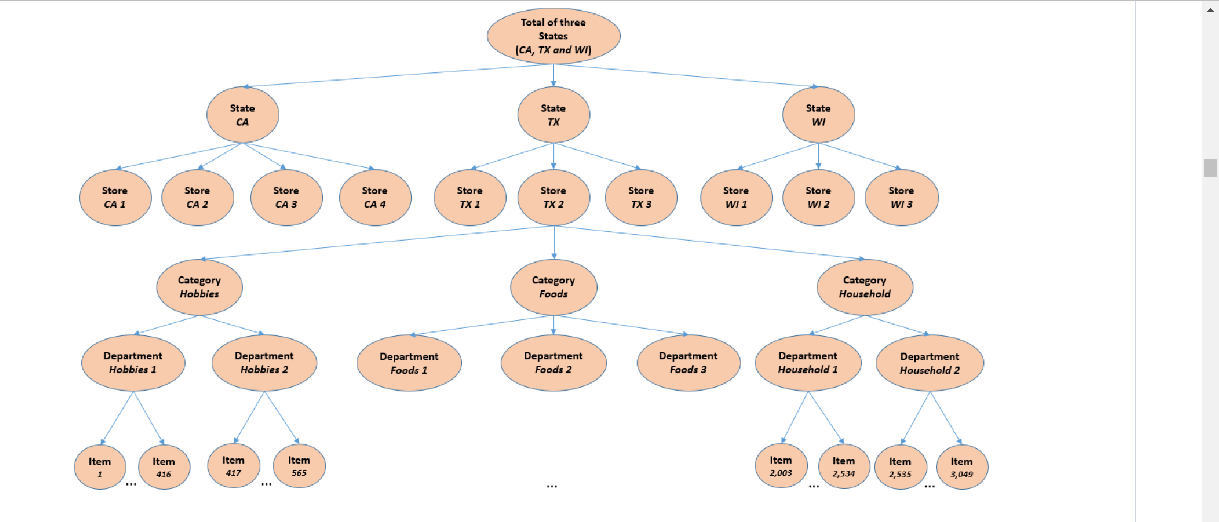

### Tổ chức file
Lưu trữ dữ liệu từ ngày 29/01/2011 đến ngày 19/06/2016. Gồm 3 file:



1.  File "calendar.csv" - chứa thông tin về ngày mà sản phẩm được bán.

  *   date: ngày có định dạng "yyyy-mm-dd".
  *   wm_yr_wk: ID của tuần mà ngày đó thuộc về.
  *   weekday: Loại ngày (Saturday - thứ 7, Sunday - Chủ nhật,..., Friday - Thứ 6).
  *   wday: ID loại ngày, đánh số từ 1-7 bắt đầu từ thứ 7 (Saturday - có ID 1,..., Friday - có ID là 7).
  *   month: Tháng của ngày đó.
  *   year: Năm của ngày đó.
  *   event_name_1: nếu ngày đó có sự kiện gì đó thì cột này ghi tên sự kiện vào.
  *   event_type_1: nếu ngày đó có sự kiện gì đó thì cột này ghi loại sự kiện.
  *   event_name_2: nếu ngày đó có thêm sự kiện ngoài event_name_1 thì cột này ghi tên sự kiện vào.
  *   event_type_2: nếu ngày đó có thêm sự kiện ngoài event_name_1 thì cột này sẽ ghi loại sự kiện.
  *   snap_CA, snap_TX, snap_WI: Mang giá trị 0, 1 nếu tại cửa hàng đó có chương trình [SNAP](https://en.wikipedia.org/wiki/Supplemental_Nutrition_Assistance_Program) (có đề cập chi tiết tại Hyperlink M5 ở trên).


2.   File "sell_price"
  *   store_id: ID của cửa hàng nơi bán sản phẩm.
  *   item_id: ID của sản phẩm.
  *   wm_yr_wk: ID của tuần thuộc về
  *   sell_price: Giá của sản phẩm trong tuần nhất định. Giá có thể thay đổi theo tuần, nếu không có thông tin thì nghĩa là sản phẩm không được bán trong tuần đó. Sự thay đổi giá có thể xảy ra ở cả tập test lẫn train.

3. File "sale_train.csv"

  * item_id: ID sản phẩm
  * dept_id: ID phòng ban(department) mà item thuộc về.
  * cat_id: ID phân loại sản phẩm.
  * store_id: ID nơi cửa hàng bán sản phẩm.
  * state_id: ID của Bang(State) mà cửa hàng thuộc về.
  * d_1...d_1941: Số lượng đơn vị sản phẩm bán được trong ngày i, tính từ 29/01/2011



### Phương thức đánh giá.

- Trong cuộc thi này, mục tiêu là dự đoán cho h = 28 ngày tới.

- Thang độ đo được sử dụng ở đây là Root Mean Squared Scaled Error(RMSSE), là một biến thể của độ đo Mean Absolute Scaled Error - được dùng trong lí thuyết xác suất thông kê để đo độ chính xác của dự đoán

$RMSSE = \sqrt{\frac{1}{h}\frac{\sum_{t=n+1}^{n+h}(Y_t - \hat{Y_t})^2}{\frac{1}{n-1}\sum_{t=2}^{n}(Y_t - Y_{t-1})^2}}$

Với $Y_t$ là giá trị thực ở tương lai, $\hat{Y_t}$ là giá trị dự đoán, n là số lượng train sample, h là thời gian dự đoán.

- Cuối cùng cuộc thi sẽ xếp hạng điểm dựa theo công thức của cuộc thi là Weighted RMSSE - WRMSSE

$WRMSSE = \sum_{i=1}^{42840} w_i * RMSSE$

Với $w_i$ là trọng số cho series thứ i của dữ liệu. Trong số này sẽ được tính dựa trên 28 ngày trong bộ dữ liệu training cho từng series. Trọng số được tính dựa trên tích lũy hay tổng số tiền dola kiếm được (số đơn vị sản phẩm bán được nhân với giá tiền riêng của nó tại thời điểm đó.)



#II. Hướng giải quyết bài toán của tác giả.

- Code của tác giả được tổng hợp tại [github](https://github.com/matthiasanderer/m5-accuracy-competition) này. Ngoài ra đây là [github](https://github.com/Mcompetitions/M5-methods) tổng hợp các code tại cuộc thi M5. Một số chỉnh sửa tại đây có thể hữu ích để hiểu vì tác giả lược bớt nhiều thứ tại chính github tác giả.

- Discussion của tác giả: https://www.kaggle.com/competitions/m5-forecasting-accuracy/discussion/164599 

## 1. N-Beats.

Tác giả đã áp dụng mô hình N-BEATS để dự đoán kết quả bài toán. N-BEATS (Neural Basic Expansion Analysis for interpretable Time Series forecasting) là một mô hình Deep Learning thuần tuý phục vụ cho dự đoán những bài toán mang tính Time Series. Trong cuộc thi M4, mô hình ES-RNN (Exponential Smoothing Recurrent Neural Network) là mô hình giành giải nhất với kết quả tốt nhất. Nhưng sau khi người ta thử lại với N-BEATS thì kết quả lại tốt hơn đến 3%.

N-BEATS sử dụng kiến trúc gồm tập hợp các feed-forward networks cùng với các residual blocks cho dự đoán và dự đoán lại. Các residual blocks này bao gồm các layer được ghép lại với nhau (DenseNet) hoặc là thêm dữ liệu đầu vào ban đầu vào dữ liệu đầu ra của từng layer (ResNet), sử dụng việc bỏ qua kết nối (skip connections) để quyết định xem layer hiện tại có hữu dụng hay không.

N-BEATS sử dụng việc bỏ qua kết nối này theo nhiều cách khác nhau, phục vụ cho việc giúp công việc ở layer tiếp theo trở nên nhẹ nhàng hơn bằng cách loại bỏ kết quả của dự đoán lại khỏi dữ liệu đầu vào của layer. Đồng thời, mỗi khối đều có kết quả dự đoán nhỏ, sẽ được thêm vào dự đoán của layer tiếp theo trong block để cho kết quả dự đoán tốt hơn.

Bên cạnh đó, N-BEATS còn hỗ trợ cho việc phân tích dữ liệu theo xu hướng và theo mùa, giúp cho kết quả thu được trở nên thực tế hơn. Và với sự kết hợp nhiều mô hình với dữ liệu đầu vào có độ lớn khác nhau giúp việc chuẩn hoá (regularizing) trở nên tốt hơn, trả về kết quả có độ chính xác cao hơn.

Tài liệu tham khảo:
- https://towardsdatascience.com/n-beats-unleashed-deep-forecasting-using-neural-basis-expansion-analysis-in-python-343dd6307010
- https://towardsdatascience.com/n-beats-beating-statistical-models-with-neural-nets-28a4ba4a4de8

<img src='https://miro.medium.com/max/836/1*1If8JU4JwFAta1kjMjkTQg.png'>

## 2. LGBM.

LightGBM là một FrameWork để xử lý thuật toán tăng cường độ dốc (Gradient Boosting) được phát triển bởi Microsoft. Gradient Boosting là một thuật toán xuất phát từ thuật toán Cây quyết định (Decision Tree), nó thực hiện việc xây dựng tuần tự nhiều Cây quyết định và tiến hành học tập.

LightGBM có nhiều ưu điểm của XGBoost , bao gồm tối ưu hóa sparse, training song song, nhiều loss functions, regularization, đóng gói và early stopping. Một sự khác biệt chính giữa cả hai nằm ở việc xây dựng cây cấu trúc. LightGBM không phát triển theo cấp độ cây - từng hàng - như hầu hết các triển khai khác.Thay vào đó, nó mọc các loại cây có lá. Nó chọn chiếc lá mà nó tin rằng sẽ giúp giảm sai số nhiều nhất.

Bên cạnh đó, LightGBM không sử dụng thuật toán học cây quyết định dựa trên sorted-based, thuật toán này tìm kiếm điểm phân tách tốt nhất trên các giá trị feature được sắp xếp như XGBoost hoặc các triển khai khác.

Thay vào đó, LightGBM triển khai thuật toán học cây quyết định dựa trên histogram-based được tối ưu hóa cao, mang lại lợi thế lớn về cả hiệu quả và mức tiêu thụ bộ nhớ.

Thuật toán LightGBM sử dụng hai kỹ thuật mới được gọi là Gradient-Based One-Side Sampling (GOSS) và Exclusive Feature Bundling (EFB) cho phép thuật toán chạy nhanh hơn trong khi vẫn duy trì mức độ chính xác cao.

- Gradient-Based One-Side Sampling (GOSS) là một phương pháp tận dụng thực tế là không có trọng số gốc cho trường hợp dữ liệu trong GBDT. Vì các dữ liệu với các độ dốc khác nhau đóng các vai trò khác nhau trong việc tính toán mức tăng thông tin, các cá thể có độ dốc lớn hơn sẽ đóng góp nhiều hơn vào việc thu thập thông tin. Do đó, để duy trì độ chính xác của thông tin, GOSS giữ các phiên bản có độ dốc lớn và bỏ ngẫu nhiên các phiên bản có độ dốc nhỏ.
- Exclusive Feature Bundling (EFB) là một near-lossless dữ liệu để giảm số lượng features hiệu quả. Trong một không gian feature thưa thớt, nhiều feature gần như là độc quyền, có nghĩa là chúng hiếm khi nhận các giá trị khác không đồng thời. Các tính năng được mã hóa một lần là một ví dụ hoàn hảo về các feature độc quyền. EFB kết hợp các feature này, giảm kích thước để cải thiện hiệu quả trong khi vẫn duy trì mức độ chính xác cao. Gói feature độc quyền thành một feature duy nhất được gọi là gói feature độc quyền.

Tài liệu tham khảo:

 - https://qiita.com/ngomanh/items/b5e8aa6f1de16ea31e89
 - https://en.wikipedia.org/wiki/LightGBM

Minh họa sự khác biệt của lgbm và xgboost.

+ XGBoost:

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/11194110/leaf.png'>


+ LGBM: 

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/11194227/depth.png'>


Nguồn: https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/

## 3. Kết hợp.

Tác giả đề nghị ra việc sử dụng 2 model khác nhau cho 2 phân vùng level id dữ liệu nhằm mục đích căn chỉnh và từ đó thu về được kết quả.


1.   Đầu tiên tác giả dùng LGBM cho đặc trưng bottom level(level id thứ 12 trên bảng thống kê dữ liệu) và huấn luyện trên từng cửa hàng(Store). Việc lựa chọn này được tác giả đưa ra giả thuyết rằng 'local buying patterns' sẽ học tốt nhất(local trend, weather, sport event, religious,... )
2.   Tiếp đến là sử dụng NBEATS cho các đặc trưng top level từ 1-5. 



## 4. Lựa chọn Feature.









- Đầu tiên tác giả sử dụng các feature mà có sẵn từ các public notebook khác. Giai đoạn test đầu tiên thì tác giả thấy rõ rằng historical sales feature(lags of X days, rolling means/std for last X days,...) cho ra kết quả không ổn định.


- Vấn đề đó được nhận định là do sự ngắt quãng trong dữ liệu về doanh số bán hàng là yếu tố gây nhiễu chính (noise).

- Và từ đó tác giả có đưa ra ví dụ về việc lựa chọn các feature thay thế:
  1.   Thông tin về 'lượng kẹo bán được một đơn vị vào thứ Hai và bán được hai đơn vị vào hôm qua' -> Thông tin này không hữu ích cho việc học của model. 
  2.   Thông tin về 'Trong vòng 4 năm, vào thứ Năm lượng kẹo bán được luôn có xu hướng nhiều hơn so với thứ Hai' -> Thông tin này khá quan trọng và học từ datetime feature.


- Tuy nhiên tác giả có giới hạn thời gian nên tác giả sử dụng các feature đến từ notebook khác là: https://www.kaggle.com/code/kyakovlev/m5-simple-fe/notebook

- Mục tiêu của notebook trên chính là tạo ra một bảng dữ liệu thống nhất các cột feature cần thiết và giảm dung lượng của bảng đó(theo notebook trên kaggle thì phát sinh lên tới 3.5GiB)


### Code demo đoạn đầu của việc lấy feature(nên demo trên kaggle, colab không đủ RAM). 

**Nhằm thể hiện tại sao lại cần xử lí giảm kích thước**

In [ ]:
# General imports
import numpy as np
import pandas as pd
import os, sys, gc, time, warnings, pickle, psutil, random

from math import ceil

from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Simple "Memory profilers" to see memory usage
def get_memory_usage():
    return np.round(psutil.Process(os.getpid()).memory_info()[0]/2.**30, 2) 
        
def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f%s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f%s%s" % (num, 'Yi', suffix)

In [ ]:
## Memory Reducer
# :df pandas dataframe to reduce size             # type: pd.DataFrame()
# :verbose                                        # type: bool
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                       df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
## Merging by concat to not lose dtypes
def merge_by_concat(df1, df2, merge_on):
    merged_gf = df1[merge_on]
    merged_gf = merged_gf.merge(df2, on=merge_on, how='left')
    new_columns = [col for col in list(merged_gf) if col not in merge_on]
    df1 = pd.concat([df1, merged_gf[new_columns]], axis=1)
    return df1

In [ ]:
########################### Vars
#################################################################################
TARGET = 'sales'         # Our main target
END_TRAIN = 1913+28         # Last day in train set
MAIN_INDEX = ['id','d']  # We can identify item by these columns

In [ ]:
########################### Load Data
#################################################################################
print('Load Main Data')

# Here are reafing all our data 
# without any limitations and dtype modification
train_df = pd.read_csv('drive/MyDrive/M5-Forecasting-Accuracy-data/sales_train_evaluation.csv')
prices_df = pd.read_csv('drive/MyDrive/M5-Forecasting-Accuracy-data/sell_prices.csv')
calendar_df = pd.read_csv('drive/MyDrive/M5-Forecasting-Accuracy-data/calendar.csv')

Load Main Data


**Make some space to squeeze everything in memory**

In [ ]:
for i in range(1,29):
    train_df = train_df.drop('d_'+ str(i), axis=1 )

In [ ]:
train_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_29,d_30,d_31,d_32,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [ ]:
########################### Make Grid
#################################################################################
print('Create Grid')

# We can tranform horizontal representation 
# to vertical "view"
# Our "index" will be 'id','item_id','dept_id','cat_id','store_id','state_id'
# and labels are 'd_' coulmns

index_columns = ['id','item_id','dept_id','cat_id','store_id','state_id']
grid_df = pd.melt(train_df, 
                  id_vars = index_columns, 
                  var_name = 'd', 
                  value_name = TARGET)

# If we look on train_df we se that 
# we don't have a lot of traning rows
# but each day can provide more train data
print('Train rows:', len(train_df), len(grid_df))

# To be able to make predictions
# we need to add "test set" to our grid
add_grid = pd.DataFrame()
for i in range(1,29):
    temp_df = train_df[index_columns]
    temp_df = temp_df.drop_duplicates()
    temp_df['d'] = 'd_'+ str(END_TRAIN+i)
    temp_df[TARGET] = np.nan
    add_grid = pd.concat([add_grid,temp_df])

grid_df = pd.concat([grid_df,add_grid])
grid_df = grid_df.reset_index(drop=True)

# Remove some temoprary DFs
del temp_df, add_grid

# We will not need original train_df
# anymore and can remove it
del train_df

# You don't have to use df = df construction
# you can use inplace=True instead.
# like this
# grid_df.reset_index(drop=True, inplace=True)

# Let's check our memory usage
print("{:>20}: {:>8}".format('Original grid_df',sizeof_fmt(grid_df.memory_usage(index=True).sum())))

# We can free some memory 
# by converting "strings" to categorical
# it will not affect merging and 
# we will not lose any valuable data
for col in index_columns:
    grid_df[col] = grid_df[col].astype('category')

# Let's check again memory usage
print("{:>20}: {:>8}".format('Reduced grid_df',sizeof_fmt(grid_df.memory_usage(index=True).sum())))

Create Grid
Train rows: 30490 58327370


In [ ]:
########################### Product Release date
#################################################################################
print('Release week')

# It seems that leadings zero values
# in each train_df item row
# are not real 0 sales but mean
# absence for the item in the store
# we can safe some memory by removing
# such zeros

# Prices are set by week
# so it we will have not very accurate release week 
release_df = prices_df.groupby(['store_id','item_id'])['wm_yr_wk'].agg(['min']).reset_index()
release_df.columns = ['store_id','item_id','release']

# Now we can merge release_df
grid_df = merge_by_concat(grid_df, release_df, ['store_id','item_id'])
del release_df

# We want to remove some "zeros" rows
# from grid_df 
# to do it we need wm_yr_wk column
# let's merge partly calendar_df to have it
grid_df = merge_by_concat(grid_df, calendar_df[['wm_yr_wk','d']], ['d'])
                      
# Now we can cutoff some rows 
# and safe memory 
grid_df = grid_df[grid_df['wm_yr_wk']>=grid_df['release']]
grid_df = grid_df.reset_index(drop=True)

# Let's check our memory usage
print("{:>20}: {:>8}".format('Original grid_df',sizeof_fmt(grid_df.memory_usage(index=True).sum())))

# Should we keep release week 
# as one of the features?
# Only good CV can give the answer.
# Let's minify the release values.
# Min transformation will not help here 
# as int16 -> Integer (-32768 to 32767)
# and our grid_df['release'].max() serves for int16
# but we have have an idea how to transform 
# other columns in case we will need it
grid_df['release'] = grid_df['release'] - grid_df['release'].min()
grid_df['release'] = grid_df['release'].astype(np.int16)

# Let's check again memory usage
print("{:>20}: {:>8}".format('Reduced grid_df',sizeof_fmt(grid_df.memory_usage(index=True).sum())))

In [ ]:
########################### Save part 1
#################################################################################
print('Save Part 1')

# We have our BASE grid ready
# and can save it as pickle file
# for future use (model training)
grid_df.to_pickle('grid_part_1.pkl')

print('Size:', grid_df.shape)

In [ ]:
########################### Prices
#################################################################################
print('Prices')

# We can do some basic aggregations
prices_df['price_max'] = prices_df.groupby(['store_id','item_id'])['sell_price'].transform('max')
prices_df['price_min'] = prices_df.groupby(['store_id','item_id'])['sell_price'].transform('min')
prices_df['price_std'] = prices_df.groupby(['store_id','item_id'])['sell_price'].transform('std')
prices_df['price_mean'] = prices_df.groupby(['store_id','item_id'])['sell_price'].transform('mean')

# and do price normalization (min/max scaling)
prices_df['price_norm'] = prices_df['sell_price']/prices_df['price_max']

# Some items are can be inflation dependent
# and some items are very "stable"
prices_df['price_nunique'] = prices_df.groupby(['store_id','item_id'])['sell_price'].transform('nunique')
prices_df['item_nunique'] = prices_df.groupby(['store_id','sell_price'])['item_id'].transform('nunique')

# I would like some "rolling" aggregations
# but would like months and years as "window"
calendar_prices = calendar_df[['wm_yr_wk','month','year']]
calendar_prices = calendar_prices.drop_duplicates(subset=['wm_yr_wk'])
prices_df = prices_df.merge(calendar_prices[['wm_yr_wk','month','year']], on=['wm_yr_wk'], how='left')
del calendar_prices

# Now we can add price "momentum" (some sort of)
# Shifted by week 
# by month mean
# by year mean
prices_df['price_momentum'] = prices_df['sell_price']/prices_df.groupby(['store_id','item_id'])['sell_price'].transform(lambda x: x.shift(1))
prices_df['price_momentum_m'] = prices_df['sell_price']/prices_df.groupby(['store_id','item_id','month'])['sell_price'].transform('mean')
prices_df['price_momentum_y'] = prices_df['sell_price']/prices_df.groupby(['store_id','item_id','year'])['sell_price'].transform('mean')

del prices_df['month'], prices_df['year']

In [ ]:
########################### Merge prices and save part 2
#################################################################################
print('Merge prices and save part 2')

# Merge Prices
original_columns = list(grid_df)
grid_df = grid_df.merge(prices_df, on=['store_id','item_id','wm_yr_wk'], how='left')
keep_columns = [col for col in list(grid_df) if col not in original_columns]
grid_df = grid_df[MAIN_INDEX+keep_columns]
grid_df = reduce_mem_usage(grid_df)

# Safe part 2
grid_df.to_pickle('grid_part_2.pkl')
print('Size:', grid_df.shape)

# We don't need prices_df anymore
del prices_df

# We can remove new columns
# or just load part_1
grid_df = pd.read_pickle('grid_part_1.pkl')

In [ ]:
########################### Merge calendar
#################################################################################
grid_df = grid_df[MAIN_INDEX]

# Merge calendar partly
icols = ['date',
         'd',
         'event_name_1',
         'event_type_1',
         'event_name_2',
         'event_type_2',
         'snap_CA',
         'snap_TX',
         'snap_WI']

grid_df = grid_df.merge(calendar_df[icols], on=['d'], how='left')

# Minify data
# 'snap_' columns we can convert to bool or int8
icols = ['event_name_1',
         'event_type_1',
         'event_name_2',
         'event_type_2',
         'snap_CA',
         'snap_TX',
         'snap_WI']
for col in icols:
    grid_df[col] = grid_df[col].astype('category')

# Convert to DateTime
grid_df['date'] = pd.to_datetime(grid_df['date'])

# Make some features from date
grid_df['tm_d'] = grid_df['date'].dt.day.astype(np.int8)
grid_df['tm_w'] = grid_df['date'].dt.week.astype(np.int8)
grid_df['tm_m'] = grid_df['date'].dt.month.astype(np.int8)
grid_df['tm_y'] = grid_df['date'].dt.year
grid_df['tm_y'] = (grid_df['tm_y'] - grid_df['tm_y'].min()).astype(np.int8)
grid_df['tm_wm'] = grid_df['tm_d'].apply(lambda x: ceil(x/7)).astype(np.int8)

grid_df['tm_dw'] = grid_df['date'].dt.dayofweek.astype(np.int8)
grid_df['tm_w_end'] = (grid_df['tm_dw']>=5).astype(np.int8)

# Remove date
del grid_df['date']

In [ ]:
########################### Save part 3 (Dates)
#################################################################################
print('Save part 3')

# Safe part 3
grid_df.to_pickle('grid_part_3.pkl')
print('Size:', grid_df.shape)

# We don't need calendar_df anymore
del calendar_df
del grid_df

In [ ]:
########################### Some additional cleaning
#################################################################################

## Part 1
# Convert 'd' to int
grid_df = pd.read_pickle('grid_part_1.pkl')
grid_df['d'] = grid_df['d'].apply(lambda x: x[2:]).astype(np.int16)

# Remove 'wm_yr_wk'
# as test values are not in train set
del grid_df['wm_yr_wk']
grid_df.to_pickle('grid_part_1.pkl')

del grid_df

In [ ]:
########################### Summary
#################################################################################

# Now we have 3 sets of features
grid_df = pd.concat([pd.read_pickle('grid_part_1.pkl'),
                     pd.read_pickle('grid_part_2.pkl').iloc[:,2:],
                     pd.read_pickle('grid_part_3.pkl').iloc[:,2:]],
                     axis=1)
                     
# Let's check again memory usage
print("{:>20}: {:>8}".format('Full Grid',sizeof_fmt(grid_df.memory_usage(index=True).sum())))
print('Size:', grid_df.shape)

# 2.5GiB + is is still too big to train our model
# (on kaggle with its memory limits)
# and we don't have lag features yet
# But what if we can train by state_id or shop_id?
state_id = 'CA'
grid_df = grid_df[grid_df['state_id']==state_id]
print("{:>20}: {:>8}".format('Full Grid',sizeof_fmt(grid_df.memory_usage(index=True).sum())))
#           Full Grid:   1.2GiB

store_id = 'CA_1'
grid_df = grid_df[grid_df['store_id']==store_id]
print("{:>20}: {:>8}".format('Full Grid',sizeof_fmt(grid_df.memory_usage(index=True).sum())))
#           Full Grid: 321.2MiB

# Seems its good enough now
# In other kernel we will talk about LAGS features
# Thank you.

In [ ]:
pd.set_option('display.max_columns', None)
grid_df.tail()

In [ ]:
########################### Final list of features
#################################################################################
grid_df.info()

# III. Quá trình thực hiện.

## 1. N-Beats.



Đầu tiên tác giả build tập dữ liệu top 5 level đầu tiên:


1.   All products, all stores, all states (1 series)
2.   All products by state (3 series)
3.   All products by store (10 series)
4.   All products by category (3 series)
5.   All products by department (7 series)

Sau đó kết hợp lại làm bảng dữ liệu thống nhất làm dữ liệu đầu vào cho NBEATS.


### Code thực hiện

- Ở đây tác giả sử dụng thư viện gluonts (có chỉnh sửa so với thư viện gốc) đã có sẵn model Nbeat để sử dụng. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
#package_path = '/content/drive/My Drive/m5data/deepar' 
#sys.path.append(package_path)

package_path = '/content/drive/MyDrive/M5-Forecasting-Accuracy-data/' 
sys.path.append(package_path)

#package_path = '/content/drive/My Drive/m5data/aggregates' 
#sys.path.append(package_path)


###### IF NOT RUN ON COLAB YOU HAVE TO MAKE SURE THAT GLUONTS PACKAGE IS IN YOUR PATH

In [ ]:
#!pip install pydantic~=1.1 ujson~=1.35
#!pip install --upgrade mxnet-cu101mkl==1.4.1 gluonts --no-deps
!pip install --upgrade pydantic ujson mxnet-cu101mkl==1.4.1 --no-deps

#!pip install --upgrade pydantic ujson mxnet-cu101mkl --no-deps

!pip uninstall -y gluonts

     |████████████████████████████████| 10.9 MB 7.6 MB/s 
     |████████████████████████████████| 45 kB 3.7 MB/s 
     |████████████████████████████████| 584.0 MB 27 kB/s 


In [ ]:
%matplotlib inline
import mxnet as mx
from mxnet import gluon
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from tqdm.autonotebook import tqdm
from pathlib import Path

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.trainer import Trainer
from gluonts.model.n_beats import NBEATSEnsembleEstimator
from gluonts.evaluation import Evaluator

/usr/local/lib/python3.7/dist-packages/mxnet/optimizer/optimizer.py:142: UserWarning: WARNING: New optimizer gluonts.trainer._base.LookaheadAdaDelta is overriding existing optimizer gluonts.trainer._base.LookaheadAdaDelta
  Optimizer.opt_registry[name].__name__))
/usr/local/lib/python3.7/dist-packages/mxnet/optimizer/optimizer.py:142: UserWarning: WARNING: New optimizer gluonts.trainer._base.LookaheadAdaGrad is overriding existing optimizer gluonts.trainer._base.LookaheadAdaGrad
  Optimizer.opt_registry[name].__name__))
/usr/local/lib/python3.7/dist-packages/mxnet/optimizer/optimizer.py:142: UserWarning: WARNING: New optimizer gluonts.trainer._base.LookaheadAdam is overriding existing optimizer gluonts.trainer._base.LookaheadAdam
  Optimizer.opt_registry[name].__name__))
/usr/local/lib/python3.7/dist-packages/mxnet/optimizer/optimizer.py:142: UserWarning: WARNING: New optimizer gluonts.trainer._base.LookaheadAdamax is overriding existing optimizer gluonts.trainer._base.LookaheadAdamax


In [ ]:
class M5Evaluator(Evaluator):
          
        def get_metrics_per_ts(self, time_series, forecast):
              successive_diff = np.diff(time_series.values.reshape(len(time_series)))
              successive_diff = successive_diff ** 2
              successive_diff = successive_diff[:-prediction_length]
              denom = np.mean(successive_diff)
              pred_values = forecast.samples.mean(axis=0)
              true_values = time_series.values.reshape(len(time_series))[-prediction_length:]
              num = np.mean((pred_values - true_values)**2)
              rmsse = num / denom
              metrics = super().get_metrics_per_ts(time_series, forecast)
              metrics["RMSSE"] = rmsse
              return metrics
          
        def get_aggregate_metrics(self, metric_per_ts):
              wrmsse = metric_per_ts["RMSSE"].mean()
              agg_metric , _ = super().get_aggregate_metrics(metric_per_ts)
              agg_metric["MRMSSE"] = wrmsse
              return agg_metric, metric_per_ts

In [ ]:
from gluonts.dataset.common import load_datasets, ListDataset
from gluonts.dataset.field_names import FieldName

**Config**

In [ ]:
single_prediction_length = 28
submission_prediction_length = single_prediction_length * 2
m5_input_path="/content/drive/MyDrive/M5-Forecasting-Accuracy-data"

SUBMISSION=True
VISUALIZE=True

VERSION=2

CALC_RESIDUALS = False

#if SUBMISSION:
#    prediction_length = submission_prediction_length
#else:
#    prediction_length = single_prediction_length


prediction_length = single_prediction_length

**Set seed**

In [ ]:
# Seed value
seed_value= 247

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set gluon seed...
mx.random.seed(seed_value)

In [ ]:
# Load data
print('Loading data...')
sell_price = pd.read_csv('%s/sell_prices.csv' % m5_input_path)
calendar = pd.read_csv('%s/calendar.csv' % m5_input_path)
train = pd.read_csv('%s/sales_train_evaluation.csv' % m5_input_path).set_index('id')
sample_sub = pd.read_csv('%s/sample_submission.csv' % m5_input_path)

Loading data...


In [ ]:
# Get column groups
cat_cols = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
ts_cols = [col for col in train.columns if col not in cat_cols]
ts_dict = {t: int(t[2:]) for t in ts_cols}

# Describe data
print('  unique forecasts: %i' % train.shape[0])
for col in cat_cols:
    print('   N_unique %s: %i' % (col, train[col].nunique()))

  unique forecasts: 30490
   N_unique item_id: 3049
   N_unique dept_id: 7
   N_unique cat_id: 3
   N_unique store_id: 10
   N_unique state_id: 3


In [ ]:
%%time
# 1. All products, all stores, all states (1 series)
all_sales = pd.DataFrame(train[ts_cols].sum()).transpose()
all_sales['id_str'] = 'all'
all_sales = all_sales[ ['id_str'] +  [c for c in all_sales if c not in ['id_str']] ]

CPU times: user 168 ms, sys: 2.25 ms, total: 170 ms
Wall time: 169 ms


In [ ]:
all_sales

,id_str,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,all,32631,31749,23783,25412,19146,29211,28010,37932,32736,...,44073,54308,59921,42362,38777,37096,36963,42552,51518,54338


In [ ]:
%%time
# 2. All products by state (3 series)
state_sales = train.groupby('state_id',as_index=False)[ts_cols].sum()
state_sales['id_str'] = state_sales['state_id'] 
state_sales = state_sales[ ['id_str'] +  [c for c in state_sales if c not in ['id_str']] ]
state_sales = state_sales.drop(['state_id'],axis=1)

CPU times: user 543 ms, sys: 97.7 ms, total: 641 ms
Wall time: 646 ms


In [ ]:
state_sales

,id_str,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,CA,14195,13805,10108,11047,9925,11322,12251,16610,14696,...,18471,23037,24704,17721,16150,15678,16297,17430,23103,24644
1,TX,9438,9630,6778,7381,5912,9006,6226,9440,9376,...,12320,12366,16249,12228,11370,10375,9162,12303,13681,14815
2,WI,8998,8314,6897,6984,3309,8883,9533,11882,8664,...,13282,18905,18968,12413,11257,11043,11504,12819,14734,14879


In [ ]:
%%time
# 3. All products by store (10 series)
store_sales = train.groupby('store_id',as_index=False)[ts_cols].sum()
store_sales['id_str'] = store_sales['store_id'] 
store_sales = store_sales[ ['id_str'] +  [c for c in store_sales if c not in ['id_str']] ]
store_sales = store_sales.drop(['store_id'],axis=1)

CPU times: user 582 ms, sys: 2.32 ms, total: 585 ms
Wall time: 588 ms


In [ ]:
%%time
# 4. All products by category (3 series)
cat_sales = train.groupby('cat_id',as_index=False)[ts_cols].sum()
cat_sales['id_str'] = cat_sales['cat_id'] 
cat_sales = cat_sales[ ['id_str'] +  [c for c in cat_sales if c not in ['id_str']] ]
cat_sales = cat_sales.drop(['cat_id'],axis=1)

CPU times: user 588 ms, sys: 1.01 ms, total: 589 ms
Wall time: 587 ms


In [ ]:
cat_sales

,id_str,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,FOODS,23178,22758,17174,18878,14603,22093,20490,27751,24862,...,30107,36576,41447,29158,26148,24790,24737,28136,33599,35967
1,HOBBIES,3764,3357,2682,2669,1814,3220,2944,3986,2899,...,3871,4893,5016,3528,3629,3740,3475,4143,5333,5280
2,HOUSEHOLD,5689,5634,3927,3865,2729,3898,4576,6195,4975,...,10095,12839,13458,9676,9000,8566,8751,10273,12586,13091


In [ ]:
%%time
# 5. All products by department (7 series)
dept_sales = train.groupby('dept_id',as_index=False)[ts_cols].sum()
dept_sales['id_str'] = dept_sales['dept_id'] 
dept_sales = dept_sales[ ['id_str'] +  [c for c in dept_sales if c not in ['id_str']] ]
dept_sales = dept_sales.drop(['dept_id'],axis=1)

CPU times: user 581 ms, sys: 753 µs, total: 581 ms
Wall time: 582 ms


In [ ]:
dept_sales

,id_str,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,FOODS_1,2343,2216,1657,1508,1209,1897,1903,2235,1925,...,4130,4257,4225,3264,3119,3073,3251,3735,4195,4031
1,FOODS_2,4094,4209,3174,3606,2869,4375,3349,4384,4273,...,5842,7563,9069,6226,5311,4648,4551,4815,5940,6535
2,FOODS_3,16741,16333,12343,13764,10525,15821,15238,21132,18664,...,20135,24756,28153,19668,17718,17069,16935,19586,23464,25401
3,HOBBIES_1,3610,3172,2497,2531,1714,3133,2855,3831,2741,...,3422,4414,4464,3109,3142,3291,3027,3761,4832,4720
4,HOBBIES_2,154,185,185,138,100,87,89,155,158,...,449,479,552,419,487,449,448,382,501,560
5,HOUSEHOLD_1,4105,3858,2827,2732,1802,2664,3161,4334,3494,...,7936,10042,10572,7609,6999,6641,6759,7974,9668,10165
6,HOUSEHOLD_2,1584,1776,1100,1133,927,1234,1415,1861,1481,...,2159,2797,2886,2067,2001,1925,1992,2299,2918,2926


In [ ]:
all_aggregates = pd.concat([all_sales,state_sales,store_sales,cat_sales,dept_sales],ignore_index=True)


In [ ]:
all_aggregates

,id_str,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,all,32631,31749,23783,25412,19146,29211,28010,37932,32736,...,44073,54308,59921,42362,38777,37096,36963,42552,51518,54338
1,CA,14195,13805,10108,11047,9925,11322,12251,16610,14696,...,18471,23037,24704,17721,16150,15678,16297,17430,23103,24644
2,TX,9438,9630,6778,7381,5912,9006,6226,9440,9376,...,12320,12366,16249,12228,11370,10375,9162,12303,13681,14815
3,WI,8998,8314,6897,6984,3309,8883,9533,11882,8664,...,13282,18905,18968,12413,11257,11043,11504,12819,14734,14879
4,CA_1,4337,4155,2816,3051,2630,3276,3450,5437,4340,...,4951,6245,6707,4568,3949,3995,4136,4433,5764,6289
5,CA_2,3494,3046,2121,2324,1942,2288,2629,3729,2957,...,4839,6507,6710,4238,3963,3789,4037,4751,7120,6614
6,CA_3,4739,4827,3785,4232,3817,4369,4703,5456,5581,...,6046,7029,7969,5891,5523,5375,5580,5542,7073,8144
7,CA_4,1625,1777,1386,1440,1536,1389,1469,1988,1818,...,2635,3256,3318,3024,2715,2519,2544,2704,3146,3597
8,TX_1,2556,2687,1822,2258,1694,2734,1691,2820,2887,...,3610,3787,5000,3708,3310,3147,2748,3664,4167,4624
9,TX_2,3852,3937,2731,2954,2492,3439,2588,3772,3657,...,4415,4424,5866,4179,4008,3518,3126,4249,4802,5217


**Prepare dataframe for gluon-ts**

In [ ]:
train_df = all_aggregates.drop(["id_str"], axis=1)
train_target_values = train_df.values

if SUBMISSION == True:
    test_target_values = [np.append(ts, np.ones(prediction_length) * np.nan) for ts in train_df.values]
else:
    test_target_values = train_target_values.copy()
    train_target_values = [ts[:-prediction_length] for ts in train_df.values]

m5_dates = [pd.Timestamp("2011-01-29", freq='1D') for _ in range(len(all_aggregates))]

train_ds = ListDataset([
      {
          FieldName.TARGET: target,
          FieldName.START: start
      }
      for (target, start) in zip(train_target_values,
                                          m5_dates
                                          )
  ], freq="D")

test_ds = ListDataset([
      {
          FieldName.TARGET: target,
          FieldName.START: start
      }
      for (target, start) in zip(test_target_values,
                                          m5_dates)
  ], freq="D")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
num_signals = len(train_df)

In [ ]:
next(iter(train_ds))

/content/drive/MyDrive/M5-Forecasting-Accuracy-data/gluonts/dataset/common.py:348: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(string, freq=freq)
/content/drive/MyDrive/M5-Forecasting-Accuracy-data/gluonts/dataset/common.py:351: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if isinstance(timestamp.freq, Tick):
/content/drive/MyDrive/M5-Forecasting-Accuracy-data/gluonts/dataset/common.py:353: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  timestamp.floor(timestamp.freq), timestamp.freq
/content/drive/MyDrive/M5-Forecasting-Accuracy-data/gluonts/dataset/common.py:353: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq


{'source': SourceContext(source='list_data', row=0),
 'start': Timestamp('2011-01-29 00:00:00', freq='D'),
 'target': array([32631., 31749., 23783., ..., 42552., 51518., 54338.], dtype=float32)}

**Define Estimators and train on aggregates**

In [ ]:
if True:

  estimator = NBEATSEnsembleEstimator(
      prediction_length=prediction_length,
      #context_length=7*prediction_length,
      meta_bagging_size = 3,  # 3, ## Change back to 10 after testing??
      meta_context_length = [prediction_length * mlp for mlp in [3,5,7] ], ## Change back to (2,7) // 3,5,7
      meta_loss_function = ['sMAPE'], ## Change back to all three MAPE, MASE ...
      num_stacks = 30,
      widths= [512],
      freq="D",
      trainer=Trainer(
                    learning_rate=6e-4,
                    #clip_gradient=1.0,
                    epochs=12, #10
                    num_batches_per_epoch=1000,
                    batch_size=16
                    #ctx=mx.context.gpu()
                )

  )

TRAINER:gluonts.trainer._base.Trainer(avg_strategy=gluonts.trainer.model_averaging.SelectNBestMean(maximize=False, metric="score", num_models=1), batch_size=16, clip_gradient=10.0, ctx=None, epochs=12, hybridize=True, init="xavier", learning_rate=0.0006, learning_rate_decay_factor=0.5, minimum_learning_rate=5e-05, num_batches_per_epoch=1000, patience=10, weight_decay=1e-08)


/usr/local/lib/python3.7/dist-packages/mxnet/optimizer/optimizer.py:142: UserWarning: WARNING: New optimizer gluonts.trainer._base.LookaheadAdaDelta is overriding existing optimizer gluonts.trainer._base.LookaheadAdaDelta
  Optimizer.opt_registry[name].__name__))
/usr/local/lib/python3.7/dist-packages/mxnet/optimizer/optimizer.py:142: UserWarning: WARNING: New optimizer gluonts.trainer._base.LookaheadAdaGrad is overriding existing optimizer gluonts.trainer._base.LookaheadAdaGrad
  Optimizer.opt_registry[name].__name__))
/usr/local/lib/python3.7/dist-packages/mxnet/optimizer/optimizer.py:142: UserWarning: WARNING: New optimizer gluonts.trainer._base.LookaheadAdam is overriding existing optimizer gluonts.trainer._base.LookaheadAdam
  Optimizer.opt_registry[name].__name__))
/usr/local/lib/python3.7/dist-packages/mxnet/optimizer/optimizer.py:142: UserWarning: WARNING: New optimizer gluonts.trainer._base.LookaheadAdamax is overriding existing optimizer gluonts.trainer._base.LookaheadAdamax


In [ ]:

if SUBMISSION:
  predictor = estimator.train(train_ds)
else:
  predictor = estimator.train(train_ds,test_ds)

**Analyze forcasts - Errors and Visual inspection**

In [ ]:
  forecast_it, ts_it = make_evaluation_predictions(
      dataset=test_ds,
      predictor=predictor,
      num_samples=100
  )

  print("Obtaining time series conditioning values ...")
  tss = list(tqdm(ts_it, total=len(test_ds)))
  print("Obtaining time series predictions ...")
  forecasts = list(tqdm(forecast_it, total=len(test_ds)))

In [ ]:
if not SUBMISSION:
      evaluator = M5Evaluator(quantiles=[0.5, 0.67, 0.95, 0.99])
      agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(test_ds))
      print(json.dumps(agg_metrics, indent=4))

**Visualize forecasts**

In [ ]:
num_series = len(all_aggregates)

In [ ]:
if VISUALIZE:
  
  plot_log_path = "./plots/"
  directory = os.path.dirname(plot_log_path)
  if not os.path.exists(directory):
      os.makedirs(directory)
      
  def plot_prob_forecasts(ts_entry, forecast_entry, path, sample_id, inline=True):
      plot_length = 150
      prediction_intervals = (50, 99)
      legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

      _, ax = plt.subplots(1, 1, figsize=(10, 7))
      ts_entry[-plot_length:].plot(ax=ax)
      forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
      ax.axvline(ts_entry.index[-prediction_length], color='r')
      plt.legend(legend, loc="upper left")
      if inline:
          plt.show()
          plt.clf()
      else:
          plt.savefig('{}forecast_{}.pdf'.format(path, sample_id))
          plt.close()

  print("Plotting time series predictions ...")
  for i in tqdm(range(num_series)):
      ts_entry = tss[i]
      forecast_entry = forecasts[i]
      plot_prob_forecasts(ts_entry, forecast_entry, plot_log_path, i)

## 2. LGBM.

- Mô hình LGBM này được tác giả áp dụng cho bottom level.
- Sử dụng bộ dữ liệu từ notebook simple-fe ở trên làm dữ liệu đầu vào. Lí do là tác giả giả thuyết rằng 'đặc trưng mua hàng' của cửa hàng sẽ được học tốt nhất tại level này.


- Model LGBM được nhiều tác giả khác nhau sử dụng và mục tiêu học của nó là 'xác suất' mà mặt hàng đó được mua. 

- Tuy nhiên thì vấn đề của model này kết quả của nó không thể hiện 'trend' hay 'seasonalities'.

<img src='https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-types-of-time-series-patterns.png'>

Nguồn: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/10_time_series_forecasting_in_tensorflow.ipynb

### Code thực hiện

In [ ]:
# General imports
import numpy as np
import pandas as pd
import os, sys, gc, time, warnings, pickle, psutil, random

# custom imports
from multiprocessing import Pool        # Multiprocess Runs

warnings.filterwarnings('ignore')

In [ ]:
########################### Helpers
#################################################################################
## Seeder
# :seed to make all processes deterministic     # type: int
def seed_everything(seed=0):
    random.seed(seed)
    np.random.seed(seed)

In [ ]:
LOSS_MULTIPLIER = 1.0

In [ ]:
# define custom loss function
def custom_asymmetric_train(y_pred, y_true):
    y_true = y_true.get_label()
    residual = (y_true - y_pred).astype("float")
    grad = np.where(residual < 0, -2 * residual, -2 * residual * LOSS_MULTIPLIER)
    hess = np.where(residual < 0, 2, 2 * LOSS_MULTIPLIER)
    return grad, hess

# define custom evaluation metric
def custom_asymmetric_valid(y_pred, y_true):
    y_true = y_true.get_label()
    residual = (y_true - y_pred).astype("float")
    loss = np.where(residual < 0, (residual ** 2) , (residual ** 2) * LOSS_MULTIPLIER) 
    return "custom_asymmetric_eval", np.mean(loss), False

In [ ]:
########################### Helper to load data by store ID
#################################################################################
# Read data
def get_data_by_store(store):
    
    # Read and contact basic feature
    df = pd.concat([pd.read_pickle(BASE),
                    pd.read_pickle(PRICE).iloc[:,2:],
                    pd.read_pickle(CALENDAR).iloc[:,2:]],
                    axis=1)
    
    # Leave only relevant store
    df = df[df['store_id']==store]

    
    ##### TESTING HYPOTHESIS - remove all rolling and lag features ...
    
    keep_cols = [col for col in list(df) if 'sales_lag' not in col]
    df = df[keep_cols]
    keep_cols = [col for col in list(df) if 'rolling' not in col]
    df = df[keep_cols]
    
    ############
    
    # Create features list
    features = [col for col in list(df) if col not in remove_features]
    df = df[['id','d',TARGET]+features]
    
    # Skipping first n rows
    df = df[df['d']>=START_TRAIN].reset_index(drop=True)
    
    return df, features

# Recombine Test set after training
def get_base_test():
    base_test = pd.DataFrame()

    for store_id in STORES_IDS:
        temp_df = pd.read_pickle('test_'+store_id+'.pkl')
        temp_df['store_id'] = store_id
        base_test = pd.concat([base_test, temp_df]).reset_index(drop=True)
    
    return base_test

In [ ]:
########################### Model params
#################################################################################
import lightgbm as lgb
lgb_params = {
        'boosting_type': 'gbdt',
        'objective': 'tweedie',
        'tweedie_variance_power': 1.1,
        'metric':'rmse',
        'n_jobs': -1,
        'seed': 42,
        'learning_rate': 0.2,
        'bagging_fraction': 0.85,
        'bagging_freq': 1, 
        'colsample_bytree': 0.85,
        'colsample_bynode': 0.85,
        #'min_data_per_leaf': 25,
        #'num_leaves': 200,
        'lambda_l1': 0.5,
        'lambda_l2': 0.5
}

In [ ]:
########################### Vars
#################################################################################
VER = 1                          # Our model version
SEED = 42                        # We want all things
seed_everything(SEED)            # to be as deterministic 
lgb_params['seed'] = SEED        # as possible
N_CORES = psutil.cpu_count()     # Available CPU cores


#LIMITS and const
TARGET      = 'sales'            # Our target
START_TRAIN = 0                  # We can skip some rows (Nans/faster training)
END_TRAIN   = 1913+28               # End day of our train set
P_HORIZON   = 28                 # Prediction horizon
USE_AUX     = False               # Use or not pretrained models

#FEATURES to remove
## These features lead to overfit
## or values not present in test set
remove_features = ['id','state_id','store_id',
                   'date','wm_yr_wk','d',TARGET]

#PATHS for Features
ORIGINAL = '../input/m5-forecasting-accuracy/'
BASE     = '../input/m5-simple-fe-evaluation/grid_part_1.pkl'
PRICE    = '../input/m5-simple-fe-evaluation/grid_part_2.pkl'
CALENDAR = '../input/m5-simple-fe-evaluation/grid_part_3.pkl'

#STORES ids
STORES_IDS = pd.read_csv(ORIGINAL+'sales_train_validation.csv')['store_id']
STORES_IDS = list(STORES_IDS.unique())

In [ ]:
########################### Train Models
#################################################################################
for store_id in STORES_IDS:
    print('Train', store_id)
    
    # Get grid for current store
    grid_df, features_columns = get_data_by_store(store_id)
    
    # Masks for 
    # Train (All data less than 1913)
    # "Validation" (Last 28 days - not real validatio set)
    # Test (All data greater than 1913 day, 
    #       with some gap for recursive features)
    train_mask = grid_df['d']<=END_TRAIN
    valid_mask = train_mask&(grid_df['d']>(END_TRAIN-P_HORIZON))
    preds_mask = grid_df['d']>(END_TRAIN-100)
    
    # Apply masks and save lgb dataset as bin
    # to reduce memory spikes during dtype convertations
    # https://github.com/Microsoft/LightGBM/issues/1032
    # "To avoid any conversions, you should always use np.float32"
    # or save to bin before start training
    # https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/discussion/53773
    train_data = lgb.Dataset(grid_df[train_mask][features_columns], 
                       label=grid_df[train_mask][TARGET])
    train_data.save_binary('train_data.bin')
    train_data = lgb.Dataset('train_data.bin')
    
    valid_data = lgb.Dataset(grid_df[valid_mask][features_columns], 
                       label=grid_df[valid_mask][TARGET])
    
    # Saving part of the dataset for later predictions
    # Removing features that we need to calculate recursively 
    grid_df = grid_df[preds_mask].reset_index(drop=True)
    keep_cols = [col for col in list(grid_df) if '_tmp_' not in col]
    grid_df = grid_df[keep_cols]
    grid_df.to_pickle('test_'+store_id+'.pkl')
    del grid_df
    
    # Launch seeder again to make lgb training 100% deterministic
    # with each "code line" np.random "evolves" 
    # so we need (may want) to "reset" it
    seed_everything(SEED)
    estimator = lgb.train(lgb_params,
                          train_data,
                          num_boost_round = 3600, 
                          early_stopping_rounds = 50, 
                          valid_sets = [train_data, valid_data],
                          verbose_eval = 100,
                          fobj = custom_asymmetric_train

                          )
    
    # Save model - it's not real '.bin' but a pickle file
    # estimator = lgb.Booster(model_file='model.txt')
    # can only predict with the best iteration (or the saving iteration)
    # pickle.dump gives us more flexibility
    # like estimator.predict(TEST, num_iteration=100)
    # num_iteration - number of iteration want to predict with, 
    # NULL or <= 0 means use best iteration
    model_name = 'lgb_model_'+store_id+'_v'+str(VER)+'.bin'
    pickle.dump(estimator, open(model_name, 'wb'))

    # Remove temporary files and objects 
    # to free some hdd space and ram memory
    !rm train_data.bin
    del train_data, valid_data, estimator
    gc.collect()
    
    # "Keep" models features for predictions
    MODEL_FEATURES = features_columns

In [ ]:
########################### Predict
#################################################################################

# Create Dummy DataFrame to store predictions
all_preds = pd.DataFrame()

# Join back the Test dataset with 
# a small part of the training data 
# to make recursive features
base_test = get_base_test()

# Timer to measure predictions time 
main_time = time.time()

# Loop over each prediction day
# As rolling lags are the most timeconsuming
# we will calculate it for whole day
for PREDICT_DAY in range(1,29):    
    print('Predict | Day:', PREDICT_DAY)
    start_time = time.time()

    # Make temporary grid to calculate rolling lags
    grid_df = base_test.copy()
        
    for store_id in STORES_IDS:
        
        # Read all our models and make predictions
        # for each day/store pairs
        model_path = 'lgb_model_'+store_id+'_v'+str(VER)+'.bin' 
        if USE_AUX:
            model_path = AUX_MODELS + model_path
        
        estimator = pickle.load(open(model_path, 'rb'))
        
        day_mask = base_test['d']==(END_TRAIN+PREDICT_DAY)
        store_mask = base_test['store_id']==store_id
        
        mask = (day_mask)&(store_mask)
        base_test[TARGET][mask] = estimator.predict(grid_df[mask][MODEL_FEATURES])
    
    # Make good column naming and add 
    # to all_preds DataFrame
    temp_df = base_test[day_mask][['id',TARGET]]
    temp_df.columns = ['id','F'+str(PREDICT_DAY)]
    if 'id' in list(all_preds):
        all_preds = all_preds.merge(temp_df, on=['id'], how='left')
    else:
        all_preds = temp_df.copy()
        
    print('#'*10, ' %0.2f min round |' % ((time.time() - start_time) / 60),
                  ' %0.2f min total |' % ((time.time() - main_time) / 60),
                  ' %0.2f day sales |' % (temp_df['F'+str(PREDICT_DAY)].sum()))
    del temp_df
    
all_preds = all_preds.reset_index(drop=True)
all_preds

In [ ]:
########################### Export
#################################################################################
# Reading competition sample submission and
# merging our predictions
# As we have predictions only for "_validation" data
# we need to do fillna() for "_evaluation" items
submission = pd.read_csv(ORIGINAL+'sample_submission.csv')[['id']]
submission = submission.merge(all_preds, on=['id'], how='left').fillna(0)
submission.to_csv('submission_v'+str(VER)+'.csv', index=False)

## 3. Alignment.

- Để giải quyết vấn đề đó thì tác giả cho rằng các top-level sẽ thể hiện tốt hơn.

- Đầu tiên tác giả xây dựng 2 model với hyperparameter khác nhau cho NBEATS để cho ra 2 bộ dữ liệu đó. Mục tiêu là lấy dự đoán của NBEATS làm nền tảng để điều chỉnh tham số cho LGBM.
- Sau đó tác giả tự điều chỉnh tham số cho mô hình LGBM sao cho 2 bên có sai lệch ít nhất có thể.

### Code thực hiện 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.simplefilter(action='ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns

**Load NBEATS reference predictions for global alignment
NBeats predictions trained and predicted on Colab with two different settings (only change in setting is num_epochs to get slightly different ensembles)**

In [ ]:
nbeats_pred01_df = pd.read_csv('../input/m5alignnbeatsv01/nbeats_toplvl_forecasts1.csv')
nbeats_pred02_df = pd.read_csv('../input/m5alignnbeatsv02/nbeats_toplvl_forecasts2.csv')

#nbeats_pred_df.head()

**Load bottom level lgb predictions for alignment**

In [ ]:
BUILD_ENSEMBLE = True

In [ ]:
if BUILD_ENSEMBLE:
    
    pred_01_df = pd.read_csv('../input/m5-final-13/submission_v1.csv')
    pred_02_df = pd.read_csv('../input/fork-of-m5-final-11/submission_v1.csv')
    pred_03_df = pd.read_csv('../input/m5-final-12/submission_v1.csv')
    pred_04_df = pd.read_csv('../input/m5-final-17/submission_v1.csv')
    pred_05_df = pd.read_csv('../input/m5-final-16/submission_v1.csv')
    #pred_06_df = pd.read_csv('..')

    avg_pred = ( np.array(pred_01_df.values[:,1:]) 
                + np.array(pred_02_df.values[:,1:]) 
                + np.array(pred_03_df.values[:,1:])
                + np.array(pred_04_df.values[:,1:])  
                + np.array(pred_05_df.values[:,1:])  
               # + np.array(pred_06_df.values[:,1:])  
               ) /5.0
    
    ## Loading predictions
    valid_pred_df = pd.DataFrame(avg_pred, columns=pred_01_df.columns[1:])
    submission_pred_df = pd.concat([pred_01_df['id'],valid_pred_df],axis=1)
    
else:
    print('Should not submit single distibution')
    #submission_pred_df = pd.read_csv('../input/m5-final-13/submission_v1.csv')

**Fill validation rows - we have no info about validation scoring**
- Even though it would not make sense at all to score public validation data it might be safest to set the submission validation values to the ground truth....

- Spamming the LB a bit more ...

In [ ]:
validation_gt_data = pd.read_csv('../input/m5-forecasting-accuracy/sales_train_evaluation.csv')
validation_gt_data['id'] = validation_gt_data['id'].str.replace('_evaluation','_validation')
validation_gt_data = validation_gt_data.drop(['item_id','dept_id','cat_id','store_id','state_id'],axis=1)
validation_gt_data = pd.concat([validation_gt_data[['id']],validation_gt_data.iloc[:,-28:]],axis=1)
validation_gt_data.columns=submission_pred_df.columns.values
#validation_gt_data

In [ ]:
submission_pred_df = pd.concat([validation_gt_data, submission_pred_df.iloc[30490:,:]],axis=0).reset_index(drop=True)
submission_pred_df

**Only work on evaluation forecasts**

In [ ]:
bottom_lvl_pred_df = submission_pred_df.iloc[30490:,:].reset_index(drop=True)
bottom_lvl_pred_df

**Reconstruct level descriptions for aggregation**

In [ ]:
name_cols = bottom_lvl_pred_df.id.str.split(pat='_',expand=True)
name_cols['dept_id']=name_cols[0]+'_'+name_cols[1]
name_cols['store_id']=name_cols[3]+'_'+name_cols[4]
name_cols = name_cols.rename(columns={0: "cat_id", 3: "state_id"})
name_cols = name_cols.drop([1,2,4,5],axis=1)
bottom_lvl_pred_df = pd.concat([name_cols,bottom_lvl_pred_df],axis=1)

**Build aggregates of predictions**

In [ ]:
# Get column groups
cat_cols = ['id', 'dept_id', 'cat_id',  'store_id', 'state_id']
ts_cols = [col for col in bottom_lvl_pred_df.columns if col not in cat_cols]
ts_dict = {t: int(t[1:]) for t in ts_cols}

# Describe data
print('  unique forecasts: %i' % bottom_lvl_pred_df.shape[0])
for col in cat_cols:
    print('   N_unique %s: %i' % (col, bottom_lvl_pred_df[col].nunique()))

In [ ]:
# 1. All products, all stores, all states (1 series)
all_sales = pd.DataFrame(bottom_lvl_pred_df[ts_cols].sum()).transpose()
all_sales['id_str'] = 'all'
all_sales = all_sales[ ['id_str'] +  [c for c in all_sales if c not in ['id_str']] ]

In [ ]:
# 2. All products by state (3 series)
state_sales = bottom_lvl_pred_df.groupby('state_id',as_index=False)[ts_cols].sum()
state_sales['id_str'] = state_sales['state_id'] 
state_sales = state_sales[ ['id_str'] +  [c for c in state_sales if c not in ['id_str']] ]
state_sales = state_sales.drop(['state_id'],axis=1)

In [ ]:
# 3. All products by store (10 series)
store_sales = bottom_lvl_pred_df.groupby('store_id',as_index=False)[ts_cols].sum()
store_sales['id_str'] = store_sales['store_id'] 
store_sales = store_sales[ ['id_str'] +  [c for c in store_sales if c not in ['id_str']] ]
store_sales = store_sales.drop(['store_id'],axis=1)

In [ ]:
# 4. All products by category (3 series)
cat_sales = bottom_lvl_pred_df.groupby('cat_id',as_index=False)[ts_cols].sum()
cat_sales['id_str'] = cat_sales['cat_id'] 
cat_sales = cat_sales[ ['id_str'] +  [c for c in cat_sales if c not in ['id_str']] ]
cat_sales = cat_sales.drop(['cat_id'],axis=1)

In [ ]:
# 5. All products by department (7 series)
dept_sales = bottom_lvl_pred_df.groupby('dept_id',as_index=False)[ts_cols].sum()
dept_sales['id_str'] = dept_sales['dept_id'] 
dept_sales = dept_sales[ ['id_str'] +  [c for c in dept_sales if c not in ['id_str']] ]
dept_sales = dept_sales.drop(['dept_id'],axis=1)

In [ ]:
all_pred_agg = pd.concat([all_sales,state_sales,store_sales,cat_sales,dept_sales],ignore_index=True)

In [ ]:
all_pred_agg.head()

In [ ]:
nbeats_pred01_df.head()

**Calculating comparision metrics**

*Interpretation*

If prediction is bigger than "true" values error will be positive -> prediction is overshooting (pos error)

If prediction is smaller than "true" values error will be negative -> prediction is undershooting (neg error)

**NBeats 01**

In [ ]:
metrics_df = nbeats_pred01_df[['id_str']]

## Calculate errors
## CAUTION: nbeats_pred_df is "truth"/actual values in this context
error = ( np.array(all_pred_agg.values[:,1:]) - np.array(nbeats_pred01_df.values[:,1:]) ) 

## Calc RMSSE
successive_diff = np.diff(nbeats_pred01_df.values[:,1:]) ** 2
denom = successive_diff.mean(1)

num = error.mean(1)**2
rmsse = num / denom

metrics_df['rmsse'] = rmsse

## Not so clean Pandas action :-) - supressing warnings for now...
metrics_df['mean_error'] = error.mean(1)
metrics_df['mean_abs_error'] = np.absolute(error).mean(1)

squared_error = error **2
mean_squ_err = np.array(squared_error.mean(1), dtype=np.float64) 

metrics_df['rmse'] = np.sqrt( mean_squ_err )

metrics_df

**NBeats 02**

In [ ]:
metrics_df = nbeats_pred02_df[['id_str']]

## Calculate errors
## CAUTION: nbeats_pred_df is "truth"/actual values in this context
error = ( np.array(all_pred_agg.values[:,1:]) - np.array(nbeats_pred02_df.values[:,1:]) ) 

## Calc RMSSE
successive_diff = np.diff(nbeats_pred01_df.values[:,1:]) ** 2
denom = successive_diff.mean(1)

num = error.mean(1)**2
rmsse = num / denom

metrics_df['rmsse'] = rmsse

## Not so clean Pandas action :-) - supressing warnings for now...
metrics_df['mean_error'] = error.mean(1)
metrics_df['mean_abs_error'] = np.absolute(error).mean(1)

squared_error = error **2
mean_squ_err = np.array(squared_error.mean(1), dtype=np.float64) 

metrics_df['rmse'] = np.sqrt( mean_squ_err )

metrics_df

**Visualizations**

**NBeats 01**

In [ ]:
for i in range(0,nbeats_pred01_df.shape[0]):
    plot_df = pd.concat( [nbeats_pred01_df.iloc[i], all_pred_agg.iloc[i] ]  , axis=1, ignore_index=True)
    plot_df = plot_df.iloc[1:,]
    plot_df = plot_df.rename(columns={0:'NBeats',1:'Predictions'})
    plot_df = plot_df.reset_index()
    #plot_df
    
    plot_df.plot(x='index', y=['NBeats', 'Predictions'] ,figsize=(10,5), grid=True, title=nbeats_pred02_df.iloc[i,0]  )

**NBeats 02**

In [ ]:
for i in range(0,nbeats_pred02_df.shape[0]):
    plot_df = pd.concat( [nbeats_pred02_df.iloc[i], all_pred_agg.iloc[i] ]  , axis=1, ignore_index=True)
    plot_df = plot_df.iloc[1:,]
    plot_df = plot_df.rename(columns={0:'NBeats',1:'Predictions'})
    plot_df = plot_df.reset_index()
    #plot_df
    
    plot_df.plot(x='index', y=['NBeats', 'Predictions'] ,figsize=(10,5), grid=True, title=nbeats_pred02_df.iloc[i,0]  )

**Submission**

In [ ]:

submission_pred_df